# Lista 3 - Algoritmos de Monte Carlo e Cadeia de Markov (2020.1)

Este notebook contém as resoluções da lista de exercícios da disciplina _Algoritmos de Monte Carlo e Cadeia de Markov_, oferecida no Programa de Engenharia e Sistemas de Computação (PESC) da Coppe/UFRJ. 

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import math
from powerlaw import ccdf
from tqdm import tqdm
import requests
import math
plt.rcParams['font.size'] = 14

## 1. Calculando $\sqrt{2}$

In [ ]:
def estimate_sqrt_2(n, realizations = 1):
    arr_realizations = np.array([])
    
    arr_bernoulli = np.array([])
    
    for _ in np.arange(realizations):
        for _ in np.arange(1, n+1, 1):
            x = 2*np.random.rand()
            y = 2*np.random.rand()
            if y <= 2-x**2:
                arr_bernoulli = np.append(arr_bernoulli, 1)
            else:
                arr_bernoulli = np.append(arr_bernoulli, [0])
    
        arr_realizations = np.append(arr_realizations, 3*np.mean(arr_bernoulli))
    
    return np.mean(arr_realizations), np.std(arr_realizations)

estimate_sqrt_2(500, 10)

In [ ]:
%%time
arr_n = [1, 10, 100, 500, 1e3, 5e3, 1e4, 5e4, 1e5, 1e6]
arr_estimations_mean = np.array([])
arr_estimations_std = np.array([])

for n in arr_n:
    print ('Estimating for n = ', n)
    mean, std = estimate_sqrt_2(n, 5)
    arr_estimations_mean = np.append(arr_estimations_mean, mean)
    arr_estimations_std = np.append(arr_estimations_std, std)   

In [ ]:
df = pd.DataFrame()
df['n'] = arr_n
df['estimate_mean'] = arr_estimations_mean
df['estimate_std'] = arr_estimations_std
df['error'] = np.absolute(df['estimate_mean'] - np.sqrt(2))/np.sqrt(2)

df

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True)

ax=axes[0]
ax.errorbar(x=df['n'], y=df['estimate_mean'], yerr=df['estimate_std'], label='Estimate')
ax.scatter(x=df['n'], y=df['estimate_mean'])
ax.axhline(np.sqrt(2), label='Target', color='Green')
ax.set_xscale('log')
ax.grid(True)
ax.set_title('Estimate')
ax.legend()

ax = axes[1]
ax.scatter(x=df['n'], y=np.log10(df['error']), color='red')
ax.grid(True)
ax.set_xlabel('Number of Samples')
ax.set_title('$log_{10}$ relative error')
# ax.set_ylim(ymin=0)
fig.savefig('./img/relative_error.jpeg', bbox_inches='tight')

## 2 Transformada Inversa

### 2.1 Distribuição Exponencial com parâmetro $\lambda$

(array([2.0000e+00, 6.0000e+00, 3.3000e+01, 5.6000e+01, 2.0900e+02,
        6.8900e+02, 2.0810e+03, 6.5880e+03, 2.1199e+04, 6.9137e+04]),
 array([-1.67024085e+00, -1.50321684e+00, -1.33619283e+00, -1.16916882e+00,
        -1.00214481e+00, -8.35120805e-01, -6.68096795e-01, -5.01072784e-01,
        -3.34048774e-01, -1.67024764e-01, -7.54301176e-07]),
 <a list of 10 Patch objects>)

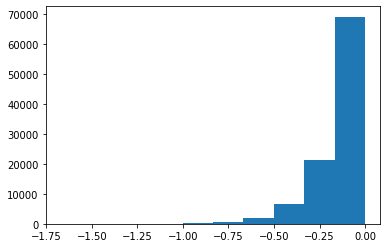

In [49]:
plt.hist(samples)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Anaconda\lib\site-packages\IPython\core\events.py:73: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:122: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


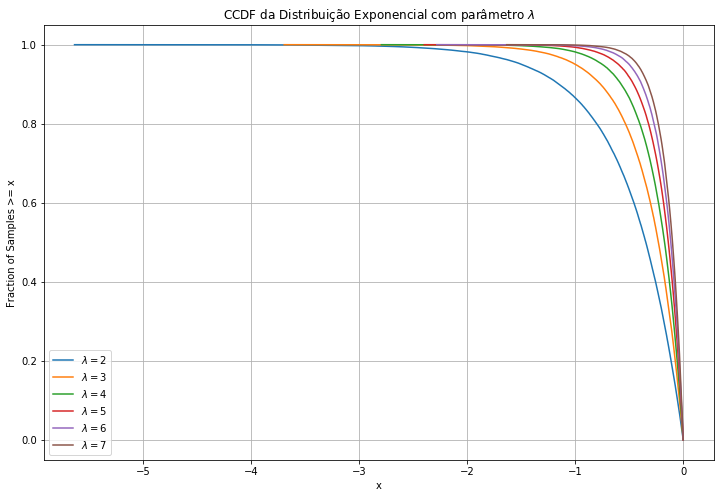

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))

n_samples = 100000

for lambda_dist in [2,3,4,5,6,7]:    
    f_inv = lambda x: math.log(1-x)/lambda_dist
    samples = [f_inv(np.random.rand()) for _ in np.arange(n_samples)]
    x, y = ccdf(samples)
    ax.plot(x, y, label = '$\lambda = {}$'.format(lambda_dist))
    
ax.set_title("CCDF da Distribuição Exponencial com parâmetro $\lambda$")
# ax.set_xscale("log"), 
# ax.set_yscale("log")
ax.set_xlabel("x"), ax.set_ylabel("Fraction of Samples >= x")
ax.grid(True)
ax.legend()
fig.savefig('./img/2_1_ccdf.jpeg', bbox_inches='tight')

## 2.2 Distribuição de Pareto

In [ ]:
def plot_ccdf(samples, name=''):
    x, y = ccdf(samples)
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
    ax.set_title("CCDF " + name)
    ax.plot(x, y)
    ax.set_xscale("log"), ax.set_yscale("log")
    ax.set_xlabel("x"), ax.set_ylabel("Fraction of Samples >= x")
    ax.grid(True)
    return fig, ax 

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Anaconda\lib\site-packages\IPython\core\events.py:73: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:122: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


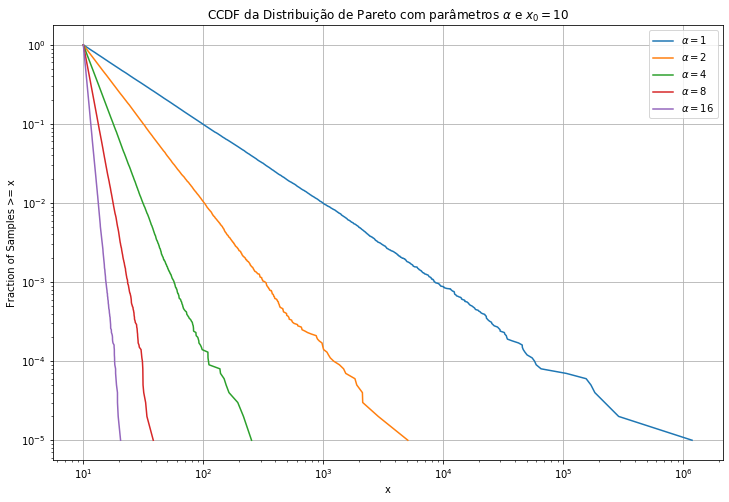

In [60]:
n_samples = 100000

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
for alpha in [1, 2, 4, 8, 16]:

    x_0 = 10
    f_inv = lambda x: x_0/((1-x)**(1/alpha))

    samples = [f_inv(np.random.rand()) for _ in np.arange(n_samples)]

    x, y = ccdf(samples)
    ax.plot(x, y, label='$\\alpha = {}$'.format(alpha))

ax.set_title("CCDF da Distribuição de Pareto com parâmetros $\\alpha$ e $x_0 = {}$".format(x_0))

ax.set_xscale("log"), ax.set_yscale("log")
ax.set_xlabel("x"), ax.set_ylabel("Fraction of Samples >= x")
ax.grid(True)
ax.legend()
fig.savefig('./img/2_2_ccdf.jpeg', bbox_inches='tight')

## 3. Contando domínio na web

In [2]:
def estimateDomains(k, n_samples, N_k):
    Mn = 0
    for _ in tqdm(range(n_samples), desc='generating samples'):
        u = np.random.randint(1,N_k+1)
        t = 26
        d = 0
        for i in range(k):
            if u < t+1:
                d = i+1
                break
            else:
                t += 26**(i+2)
        domain = ''
        for i in range(d):
            domain += chr(np.random.randint(1,27)+96)
        url = 'http://www.' + domain + '.ufrj.br'
        try:
            request = requests.get(url, headers={'Connection': 'close'})
            res = request.status_code
            if res == 200:
                Mn += 1
        except:
            pass
    Mn = Mn/n_samples
    return Mn*N_k

In [3]:
n = 26
k = 4
# N_k = np.sum([math.factorial(n)/math.factorial(k)*math.factorial(n-k) for k in [1,2,3,4]])
N_k = np.sum([26**i for i in [1,2,3,4]])
N_k

475254

In [4]:
k = 4
array_n = [1e0, 1e1, 1e2, 1e3, 1e4]
results = []
for n in array_n:
    print (n)
    results.append(estimateDomains(k, int(n), N_k))

1.0


generating samples: 100%|█████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.11it/s]


10.0


generating samples: 100%|███████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 15.07it/s]


100.0


generating samples: 100%|█████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 14.00it/s]


1000.0


generating samples: 100%|███████████████████████████████████████████████████████| 1000/1000 [01:44<00:00, 11.73it/s]


10000.0


generating samples: 100%|█████████████████████████████████████████████████████| 10000/10000 [27:57<00:00,  6.93it/s]


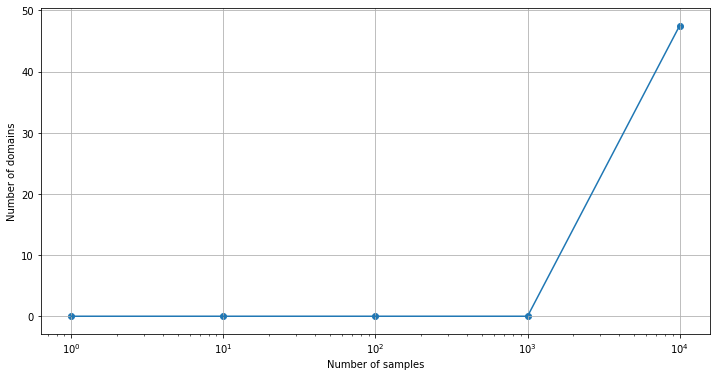

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(array_n, results)
ax.scatter(array_n, results)
ax.set_xscale('log')
ax.grid(True)
ax.set_xlabel('Number of samples'), ax.set_ylabel('Number of domains')
fig.savefig('./img/3_number_of_domains.jpeg', bbox_inches='tight')

## 4. Gerando amostras normais

In [61]:
lambda_dist = 1
f_y_inv = lambda x: -1/lambda_dist * math.log(1-x)
f_y = lambda x: np.exp(-lambda_dist*x)/lambda_dist
f_z = lambda x: (2*np.pi)**(-0.5) * np.exp(-0.5 * x**2)
f_z(0)
f_y_inv(np.random.rand())

0.053107888405660914

In [62]:
n_samples = 50000
samples = []
import random
for _ in np.arange(n_samples):
    rejected = True
    while rejected:
        x = np.random.rand()
        i = f_y_inv(x)
        u = random.uniform(0, f_y(i))
        if u < f_z(i):
            rejected = False
        
    samples.append(i)
    samples.append(-i)


C:\Anaconda\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


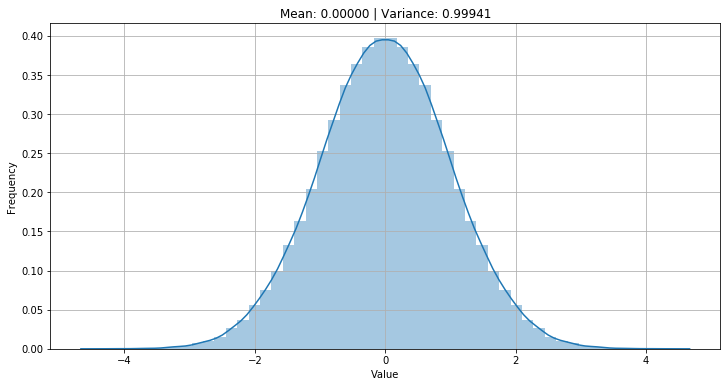

In [63]:
fig, ax = plt.subplots(figsize=(12,6))
sns.distplot(samples, ax=ax)
ax.grid(True)
ax.set_title('Mean: {:.05f} | Variance: {:.05f}'.format(np.mean(samples), np.std(samples)**2))
ax.set_xlabel('Value'), ax.set_ylabel('Frequency')
fig.savefig('./img/4_distribution.jpeg', bbox_inches='tight')

## 5. Importance Sampling

In [2]:
%%time
N = 1e3
gf = lambda i, m: (np.log(i))**2/(i**(m-2))

array_m = np.linspace(0.5, 1.5, 20)
result = []
for m in array_m:
    print ('processing m = ', m)
    K = np.sum([i**m for i in np.arange(1, N, 1)])
    soma = K*np.sum([gf(i, m) for i in np.arange(1, N, 1)])
    result.append(soma)

processing m =  0.5
processing m =  0.5526315789473684
processing m =  0.6052631578947368
processing m =  0.6578947368421053
processing m =  0.7105263157894737
processing m =  0.763157894736842
processing m =  0.8157894736842105
processing m =  0.868421052631579
processing m =  0.9210526315789473
processing m =  0.9736842105263157
processing m =  1.026315789473684
processing m =  1.0789473684210527
processing m =  1.131578947368421
processing m =  1.1842105263157894
processing m =  1.236842105263158
processing m =  1.2894736842105263
processing m =  1.3421052631578947
processing m =  1.394736842105263
processing m =  1.4473684210526314
processing m =  1.5
Wall time: 118 ms


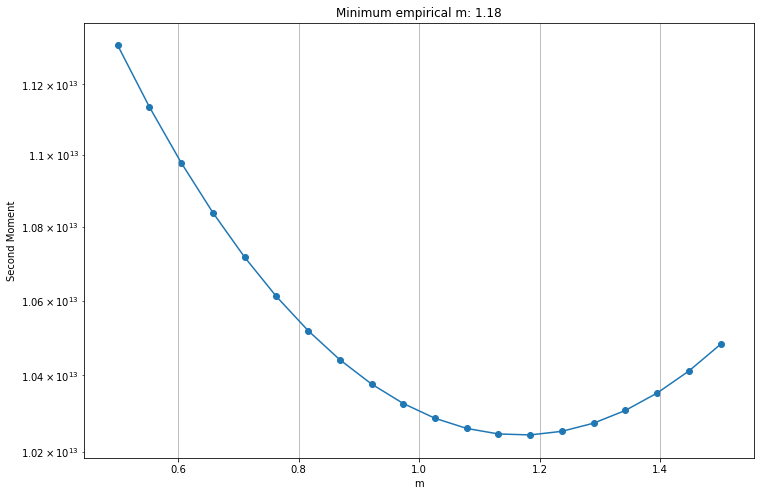

In [3]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(array_m, result)
ax.scatter(array_m, result)
ax.set_yscale('log')
ax.grid(True)
ax.set_ylabel('Second Moment'), ax.set_xlabel('m')
ax.set_title('Minimum empirical m: {:.02f}'.format(array_m[np.argmin(result)]))
fig.savefig('./img/5_1_m_sweep.jpeg', bbox_inches='tight')

In [4]:
m = 1.2
K = np.sum([i**m for i in np.arange(1, N+1, 1)])
'{:.04E}'.format(K*np.sum([gf(i, m) for i in np.arange(1, N+1, 1)]))


'1.0290E+13'

## 5.2

In [31]:
%%time
g = lambda i: i*np.log(i)
h = lambda i: (i**m)/K
f_h_inv = lambda x: ((m+1)*K*x)**(1/(m+1))
target = np.sum([g(i) for i in np.arange(1, 1e3+1, 1)])
print (target)

3207332.341531311
Wall time: 3 ms


C:\Anaconda\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


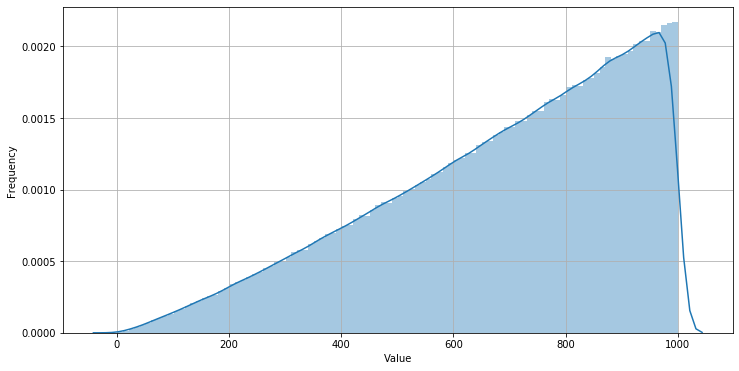

In [32]:
import seaborn as sns
n = 1e6
samples = []
for _ in np.arange(1, n, 1):
    x = np.random.rand()
    samples.append(f_h_inv(x))
    
fig, ax = plt.subplots(figsize=(12,6))    
sns.distplot(samples, bins=100, ax=ax)
ax.grid(True)
ax.set_xlabel('Value'), ax.set_ylabel('Frequency')
fig.savefig('./img/5_h_distribution.jpeg', bbox_inches='tight')

In [40]:
array_n = [1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]
error = []
estimates = []
for n in array_n:
    print ('Making process for n = {}'.format(n))
    samples = []
    for _ in np.arange(1, n, 1):
        x = np.random.rand()
        y = f_h_inv(x)
        samples.append(g(y)/h(y))
    estimate = np.mean(samples)
    error.append(np.absolute(target-estimate)/target)
    estimates.append(estimate)

Making process for n = 10.0
Making process for n = 100.0
Making process for n = 1000.0
Making process for n = 10000.0
Making process for n = 100000.0
Making process for n = 1000000.0
Making process for n = 10000000.0


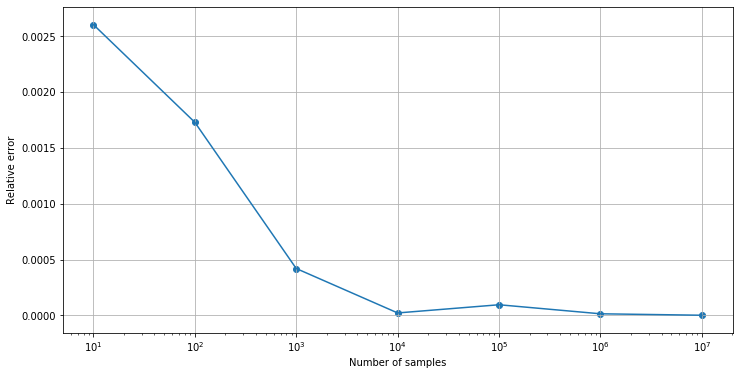

In [41]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(array_n, error)
ax.scatter(array_n, error)
ax.set_xlabel('Number of samples'), ax.set_ylabel('Relative error')
ax.set_xscale('log')
ax.grid(True)
fig.savefig('./img/5_relative_error.jpeg', bbox_inches='tight')

## 6. Integração de Monte Carlo

In [116]:
def estimate_g(alpha, a, b, N):
    samples = []
    for _ in np.arange(n_samples):
        x = random.uniform(a, b)
        samples.append(f(x))
    
    return np.mean(samples)*(b-a)

array_n = [1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]
array_alpha = [1,2,3]
array_b = [1,2,4]
a = 0

df = pd.DataFrame(columns=['n', 'alpha', 'b', 'estimate', 'relative_error'])
for n_samples in array_n:
    print (n_samples)
    for b in array_b:
        for alpha in array_alpha:
            target = (b**(alpha+1)-a**(alpha+1))/(alpha+1)
            estimate = estimate_g(alpha, a, b, n_samples)
            error = np.absolute(target-estimate)/target
            df.loc[df.shape[0]] = [n_samples, alpha, b, estimate, error]

10.0
100.0
1000.0
10000.0
100000.0
1000000.0
10000000.0


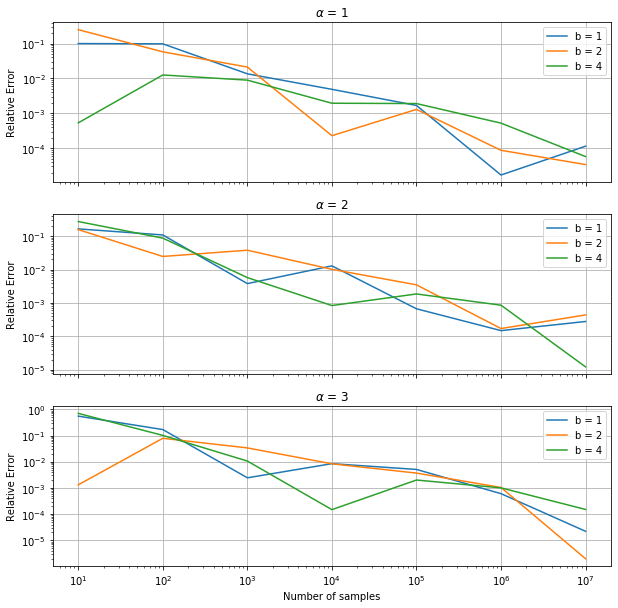

In [118]:
fig, axes = plt.subplots(nrows = 3, figsize=(10,10), sharex=True)
for alpha in array_alpha:
    ax = axes[alpha-1]
    for b in array_b:
        df_plot = df.query('alpha == @alpha & b == @b')
        ax.plot(df_plot['n'], df_plot['relative_error'], label='b = {}'.format(b))
        ax.legend()
        ax.set_title('$\\alpha$ = {}'.format(alpha))
        ax.set_xscale('log'), ax.set_yscale('log')
        ax.grid(True)
        ax.set_ylabel('Relative Error')
        
ax.set_xlabel('Number of samples')
fig.savefig('./img/6_relative_error.jpeg', bbox_inches='tight')

## 7. Gerando permutações

In [ ]:

os.listdir('./')

In [ ]:
df = pd.read_csv('./temp/df_elapsed_time.csv', sep=';')
df['elapsed_time'] = df['elapsed_time']/1e3
df

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols=1, figsize=(12,6), sharex=True)
for i, n in enumerate(df['n'].unique()):
    ax = axes[i]
    df_plot = df[df['n'] == n]
    ax.plot(df_plot['k'], df_plot['elapsed_time'], label='n = {:.0E}'.format(n))
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylabel('Elapsed Time (s)')
    ax.grid(True)
    ax.legend()

ax.set_xlabel('K') 
fig.savefig('./img/7_elapsed_time.jpeg', bbox_inches='tight')


In [ ]:
pd.Series(centroid, index=df.columns)[['x', 'y']].to_numpy()


In [ ]:
def get_dissimilarity(centroid, df, attributes = None):
    """ Function to get dissimilarity between entries and a cluster centroid
    params:
        centroid: list or numpy array
        df: pandas dataframe
        attributes: attributes to use when calculating dissimilarity
        
    return: pandas series with calculated dissimilarity for each row of df
    """
    centroid = np.array(centroid)
    if attributes is not None:
        centroid = pd.Series(centroid, index=df.columns)[attributes]        
        dissim = np.sum(df[attributes] != centroid[attributes], axis=1)/centroid.shape[0]
    else:
        dissim = np.sum(df != centroid, axis=1)/centroid.shape[0]
        
    return dissim

centroid = ['A', 'B', 'C']

df = pd.DataFrame(columns = ['x', 'y', 'z'])
df.loc[df.shape[0]] = ['A', 'A', 'B']
# df.loc[df.shape[0]] = ['A', 'B', 'B']
# df.loc[df.shape[0]] = ['A', 'C', 'B']
# df.loc[df.shape[0]] = ['A', 'B', 'C']
# df.loc[df.shape[0]] = ['D', 'E', 'F']

df['dissimilarity'] = get_dissimilarity(centroid, df, attributes=None)
print (centroid)
df